<a href="https://colab.research.google.com/github/David-gutierrez-rodriguez/Simulacion-I/blob/main/Generador_congruencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, stdev

In [2]:
def rand_num(seed, a, c, m):
    """
    Genera una secuencia de números pseudoaleatorios usando el método congruencial.

    Parámetros:
    seed (int): Valor inicial (semilla).
    a (int):    Multiplicador.
    c (int):    Incremento.
    m (int):    Módulo.

    Retorna:
    list:       Lista de números generados hasta que se repita un valor.
    """
    rand = [seed]             # Lista que almacena los números generados
    xn = (a * seed + c) % m   # Primera iteración del generador
    i = 1

    # Se genera la secuencia hasta encontrar un número repetido
    while xn not in rand:
        rand.append(xn)
        xn = (a * rand[i] + c) % m
        i += 1

    # Se añade el primer número repetido para cerrar el ciclo
    xn = (a * rand[i - 1] + c) % m
    rand.append(xn)

    return rand

In [27]:
# Parámetros del generador congruencial
a = 101     # Multiplicador
c = 221     # Incremento
x0 = 9      # Semilla inicial
m = 10000   # Módulo

# Generación de números pseudoaleatorios
nums = rand_num(x0, a, c, m)
print(f"Ciclo de vida: {len(nums) - 1}")  # Se resta 1 porque el último número es repetido

Ciclo de vida: 10000


In [28]:
# Creación de un DataFrame con los números generados
df = pd.DataFrame({
    "x_n": nums,
    "x_n/m": [x / m for x in nums]
})
display(df)

,x_n,x_n/m
0,9,0.0009
1,1130,0.1130
2,4351,0.4351
3,9672,0.9672
4,7093,0.7093
...,...,...
9996,6525,0.6525
9997,9246,0.9246
9998,4067,0.4067
9999,988,0.0988


In [29]:
# Convertir los números a un array de NumPy para análisis
nums = np.array(nums[:-1])  # Se excluye el último número repetido
nums = nums / m             # Normalización dividiendo entre m

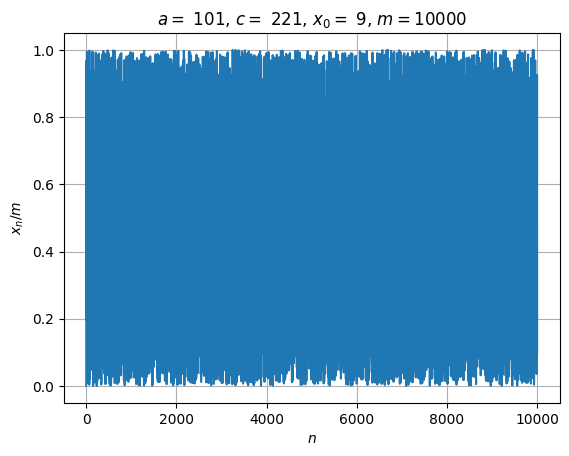

In [30]:
# Gráfica de la secuencia generada
plt.plot(nums)
plot_title = f"$a =$ {a}, $c =$ {c}, $x_0 =$ {x0}, $m = ${m}"
plt.title(plot_title)
plt.xlabel("$n$")
plt.ylabel("$x_n/m$")
plt.grid(True)
plt.show()

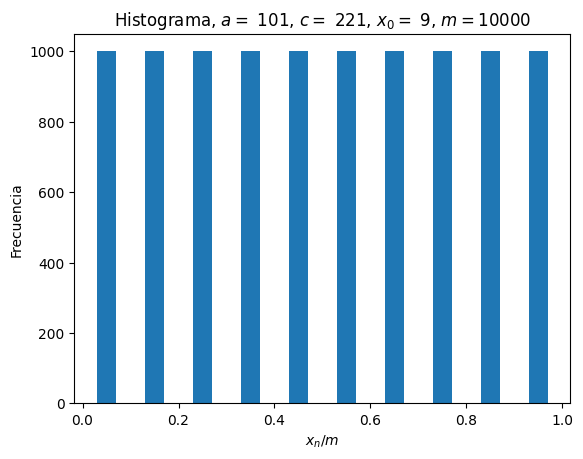

In [31]:
# Histograma de los valores generados
plt.hist(nums, rwidth=0.4)
plt.title(f"Histograma, {plot_title}")
plt.xlabel("$x_n/m$")
plt.ylabel("Frecuencia")
plt.show()

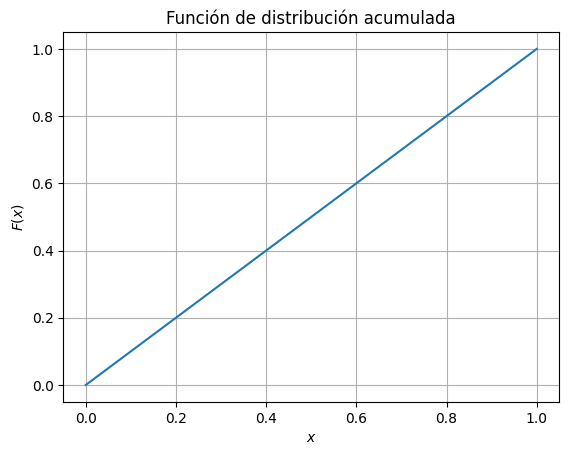

In [32]:
# Cálculo de la función de distribución acumulada (CDF)
nums.sort()  # Se ordenan los valores generados
F = [(i + 1) / len(nums) for i in range(len(nums))]

# Gráfica de la función de distribución acumulada
plt.plot(nums, F)
plt.title("Función de distribución acumulada")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.grid(True)
plt.show()

In [33]:
# Cálculo de la media y la varianza de los números generados
mu = mean(nums)
var = stdev(nums) ** 2  # Se eleva al cuadrado la desviación estándar
print(f"Media: {mu}")
print(f"Varianza: {var}")

Media: 0.49995
Varianza: 0.08334166666666668


In [34]:
# Comparación con los valores teóricos
print("Diferencia entre media y desviación estándar teóricas:\n")
print(f"Media teórica: {1/2}")
print(f"Diferencia: {abs(1/2 - mu)}\n")
print(f"Varianza teórica: {1/12}")
print(f"Diferencia: {abs(1/12 - var)}")

Diferencia entre media y desviación estándar teóricas:

Media teórica: 0.5
Diferencia: 4.999999999999449e-05

Varianza teórica: 0.08333333333333333
Diferencia: 8.333333333346293e-06
